In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp_ongc = pd.read_csv("ONGC new.csv")
temp_ntpc = pd.read_csv("NTPC new.csv")
temp_gail = pd.read_csv("GAIL new.csv")
data_ongc = temp_ongc.iloc[:501,-1:]
data_ntpc = temp_ntpc.iloc[:501,-1:]
data_gail = temp_gail.iloc[:501,-1:]

In [3]:
data = pd.concat([data_ongc, data_ntpc, data_gail], axis = 1, ignore_index=True)
data.columns=['ONGC', 'NTPC', 'GAIL']
data

,ONGC,NTPC,GAIL
0,259.82,158.32,386.67
1,261.71,160.31,390.24
2,265.74,159.77,393.56
3,264.53,158.42,381.71
4,255.79,156.61,379.77
...,...,...,...
496,287.75,137.92,340.40
497,292.14,137.99,340.50
498,291.84,137.63,340.09
499,289.69,136.55,343.11


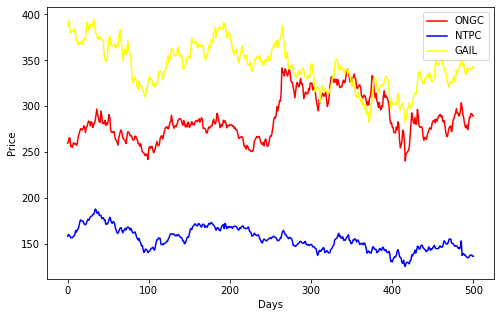

In [4]:
plt.figure(figsize=(8,5))
plt.plot(data['ONGC'], color = 'red')
plt.plot(data['NTPC'], color = 'blue')
plt.plot(data['GAIL'], color = 'yellow')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['ONGC','NTPC','GAIL'])
plt.show()

In [5]:
# calculating pct change and mean pct change
pct_change = data[["ONGC", "NTPC", "GAIL"]].pct_change()
mean_pct_change = pct_change.mean()
mean_pct_change

ONGC    0.000353
NTPC   -0.000196
GAIL   -0.000140
dtype: float64

# ONGC simulation for different initial values

In [6]:
starting_prices = np.random.normal(259.82,1,1000) # randomly generating values between with 148 mean and SD=1 for starting price
total_days = 501
ONGC_pct_change = pct_change['ONGC']

arr = np.full((len(starting_prices), total_days), 1.0) #array to store new prices

for i in range(len(starting_prices)):
    for j in range(total_days):
        if j==0:
            arr[i][j]=starting_prices[i]  #using initial starting price to compute first value
        else:
            arr[i][j]=arr[i][j-1] + arr[i][j-1] * ONGC_pct_change[j]  #computing using just previous value

            
ONGC = pd.DataFrame(arr)
ONGC.set_axis(labels = [x for x in starting_prices], axis = 0, inplace=True)
ONGC

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
257.307761,257.307761,259.179486,263.170519,261.972219,253.316727,254.039669,253.049338,257.614763,257.386987,256.228300,...,273.747253,276.708342,271.905237,278.015579,285.215284,284.967701,289.315254,289.018154,286.888943,286.750297
259.745949,259.745949,261.635411,265.664262,264.454607,255.717098,256.446890,255.447175,260.055861,259.825927,258.656260,...,276.341218,279.330366,274.481748,280.649990,287.917918,287.667989,292.056738,291.756823,289.607436,289.467476
260.274820,260.274820,262.168129,266.205183,264.993065,256.237766,256.969044,255.967293,260.585363,260.354960,259.182912,...,276.903879,279.899113,275.040623,281.221424,288.504150,288.253712,292.651397,292.350872,290.197108,290.056863
259.229153,259.229153,261.114855,265.135691,263.928443,255.208318,255.936658,254.938932,259.538448,259.308971,258.141632,...,275.791404,278.774604,273.935634,280.091603,287.345070,287.095639,291.475656,291.176338,289.031227,288.891545
260.088295,260.088295,261.980247,266.014408,264.803159,256.054134,256.784888,255.783855,260.398615,260.168378,258.997170,...,276.705437,279.698524,274.843516,281.019887,288.297395,288.047136,292.441670,292.141360,289.989140,289.848995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.991191,258.991191,260.875162,264.892307,263.686166,254.974046,255.701718,254.704908,259.300202,259.070936,257.904668,...,275.538238,278.518700,273.684171,279.834489,287.081299,286.832096,291.208092,290.909049,288.765908,288.626354
259.676071,259.676071,261.565024,265.592791,264.383461,255.648303,256.377899,255.378453,259.985899,259.756026,258.586674,...,276.266875,279.255219,274.407905,280.574487,287.840460,287.590599,291.978167,291.678333,289.529524,289.389601
262.208878,262.208878,264.116255,268.183308,266.962183,258.141824,258.878536,257.869342,262.521728,262.289613,261.108856,...,278.961504,281.978995,277.084403,283.311132,290.647975,290.395676,294.826039,294.523281,292.353513,292.212226
259.397711,259.397711,261.284639,265.308089,264.100055,255.374261,256.103074,255.104700,259.707207,259.477581,258.309482,...,275.970730,278.955871,274.113754,280.273725,287.531909,287.282316,291.665181,291.365668,289.219163,289.079390


In [7]:
mean_values = pd.DataFrame(ONGC.values.mean(axis = 0))
mean_values.head()

,0
0,259.821792
1,261.711805
2,265.741833
3,264.531825
4,255.791764


In [8]:
# evaluating performance using MSE
y_predicted = mean_values.values
y_true = data['ONGC'].values
percentage_error = ((abs(y_true-y_predicted)/y_true)*100).mean()
percentage_error

9.115322183726088

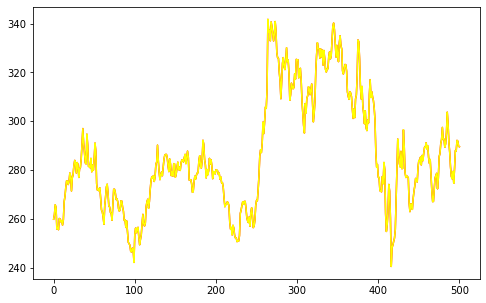

<Figure size 3600x3600 with 0 Axes>

In [9]:
plt.figure(figsize= (8,5))
plt.plot(y_predicted, color = 'red')
plt.plot(y_true, color = 'yellow')
plt.figure(figsize=(50,50))
plt.show()

# Monte Carlo Approach

In [10]:
returns = np.log(1 + pct_change)
returns.head()

,ONGC,NTPC,GAIL
0,NaN,NaN,NaN
1,0.007248,0.012491,0.009190
2,0.015281,-0.003374,0.008472
3,-0.004564,-0.008486,-0.030572
4,-0.033598,-0.011491,-0.005095


In [11]:
mean_returns = returns.mean()
mean_returns

ONGC    0.000217
NTPC   -0.000294
GAIL   -0.000242
dtype: float64

In [12]:
std_returns = returns.std()
std_returns

ONGC    0.016547
NTPC    0.014004
GAIL    0.014273
dtype: float64

In [13]:
# random normal returns with mean = mean_returns and std = std_returns for all three companies.
simulated_returns = 1 + np.random.normal(mean_returns, std_returns, size = (total_days,3))
simulated_returns = pd.DataFrame(simulated_returns, columns=["ONGC", "NTPC", "GAIL"])
simulated_returns

,ONGC,NTPC,GAIL
0,0.995308,0.998545,1.009618
1,0.986797,1.019018,0.983484
2,1.011228,1.005844,0.992806
3,1.004525,0.995749,1.006135
4,0.995470,1.005874,1.003297
...,...,...,...
496,1.024917,1.005530,1.022204
497,0.991382,0.999460,0.999255
498,0.991938,0.970037,0.993147
499,1.034287,1.008152,0.988422


In [14]:
ONGC_returns = simulated_returns.iloc[:, 0]
NTPC_returns = simulated_returns.iloc[:, 1]
GAIL_returns = simulated_returns.iloc[:, 2]

# chosing last day price from dataset as initial value for prediction.
ONGC_initial_value = data["ONGC"].iloc[-1]
NTPC_initial_value = data["NTPC"].iloc[-1]
GAIL_initial_value = data["GAIL"].iloc[-1]

In [15]:
prediction_ONGC = pd.DataFrame(ONGC_initial_value * ONGC_returns.cumprod(), columns=['ONGC'])
prediction_NTPC = pd.DataFrame(NTPC_initial_value * NTPC_returns.cumprod(), columns=['NTPC'])
prediction_GAIL = pd.DataFrame(GAIL_initial_value * GAIL_returns.cumprod(), columns=['GAIL'])

In [16]:
predictions = pd.concat([prediction_ONGC, prediction_NTPC, prediction_GAIL], axis = 1, ignore_index=False)
predictions

,ONGC,NTPC,GAIL
0,288.191494,136.501082,345.935518
1,284.386565,139.097123,340.222017
2,287.579554,139.910055,337.774347
3,288.880806,139.315255,339.846705
4,287.572289,140.133622,340.967340
...,...,...,...
496,279.793593,108.456280,207.349849
497,277.382215,108.397683,207.195395
498,275.145821,105.149787,205.775461
499,284.579875,106.007010,203.392981


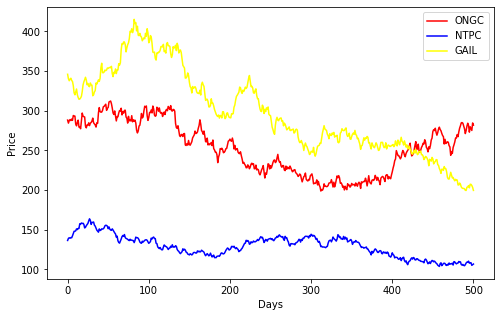

In [17]:
plt.figure(figsize=(8,5))
plt.plot(predictions['ONGC'], color = 'red')
plt.plot(predictions['NTPC'], color = 'blue')
plt.plot(predictions['GAIL'], color = 'yellow')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['ONGC','NTPC','GAIL'])
plt.show()

# Linear Model for Predictions

In [18]:
ongc_data = pd.read_csv("ONGC new.csv")
ongc_data = ongc_data[["Prev Close", "Open", "High", "Low","Last","Close", "VWAP"]]
ongc_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP
0,256.60,257.50,262.85,256.45,258.60,258.35,259.82
1,258.35,261.10,264.50,259.65,263.80,263.20,261.71
2,263.20,264.00,267.60,261.10,266.30,266.70,265.74
3,266.70,268.45,269.95,261.00,262.05,261.75,264.53
4,261.75,256.40,258.40,253.65,255.85,255.65,255.79


In [19]:
independent_parameters = ongc_data.iloc[:,:6]
dependent_parameter = ongc_data.iloc[:,-1]

<AxesSubplot:>

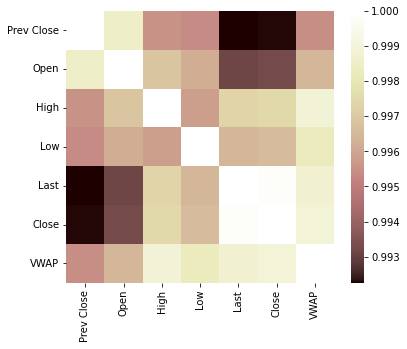

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(ongc_data.corr(), annot=False, cmap='pink')

## Conclusion: VWAP depends nearly on all the independent parameters.
##### Since all are having correlation value in range (0.993, 0.999)

In [21]:
x_train = independent_parameters.iloc[:501,:]
y_train = dependent_parameter.iloc[:501]

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([ 0.02504623,  0.00697272,  0.3604232 ,  0.22975417, -0.09677132,
        0.4761617 ])

In [23]:
x_test = independent_parameters.iloc[501:993,:]
y_test = dependent_parameter.iloc[501:993]
y_predicted_model = model.predict(x_test)
error = ((y_test - y_predicted_model)**2).mean()
error

1.3241865601535558

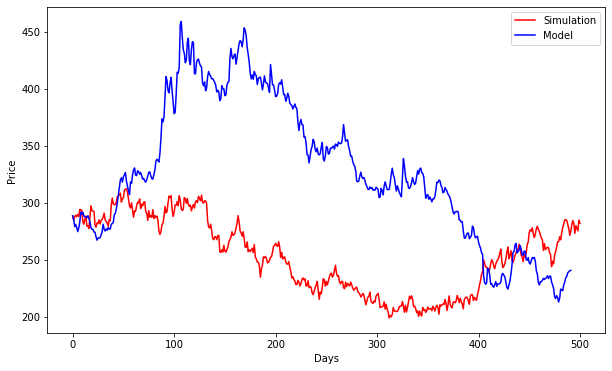

In [24]:
plt.figure(figsize=(10,6))
plt.plot(predictions['ONGC'], color = 'red')
plt.plot(y_predicted_model, color = 'blue')
plt.legend(['Simulation', "Model"])
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()